In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
data=pd.read_csv("/content/diabetes.csv")


X=data.drop('Outcome',axis=1)
y=data['Outcome']
print(y)


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
print("OutCome True : ",(data.Outcome.values == 1).sum())
print("OutCome False : ",(data.Outcome.values == 0).sum())

OutCome True :  268
OutCome False :  500


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [ ]:
data.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [ ]:
data.mean()


Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [ ]:
data.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


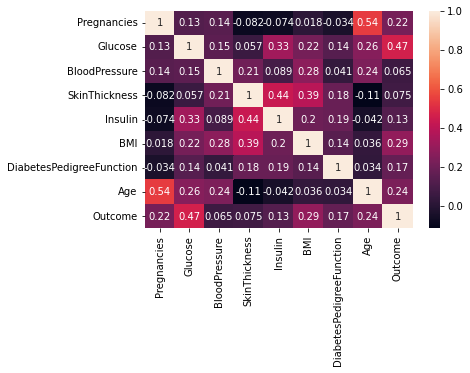

In [ ]:
corr = data.corr()
sns.heatmap(corr, annot=True)

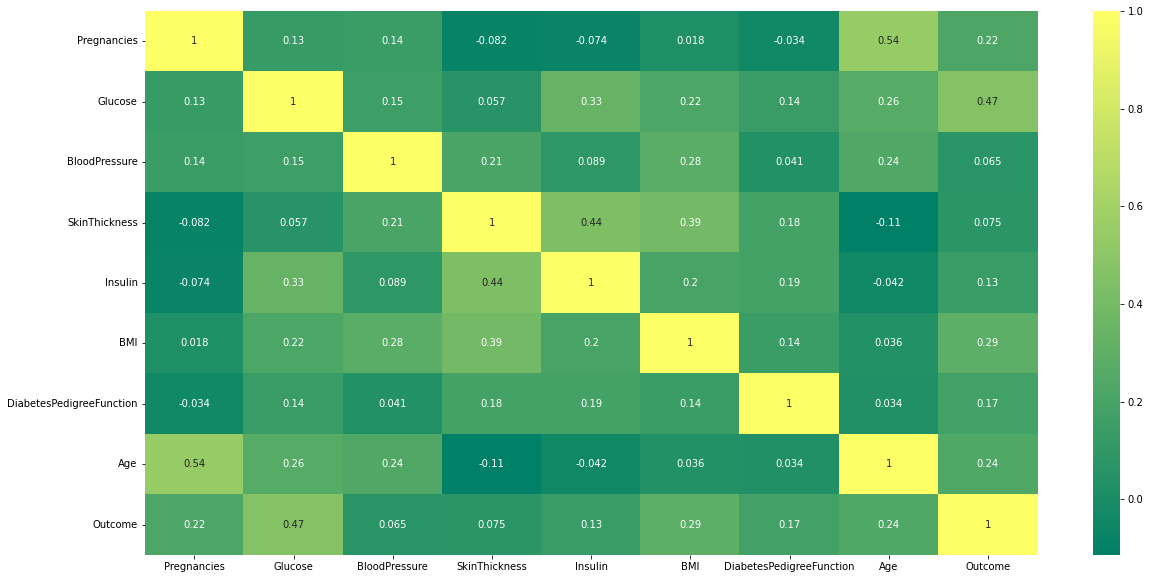

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), annot = True, cmap="summer")



In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_x = scaler.transform(X)

**Features Scaling:**
we use Feature Scaling to bring all values to the same magnitudes.

In [ ]:
pca = PCA(n_components=8)
pca.fit(scaled_x)
pca_x = pca.transform(scaled_x)
pca_x.shape

(768, 8)

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. As we know that before training the model with data, we divide the data into two parts – train data and test data. In cross-validation, the process divides the train data further into two parts – the train data and the validation data.
The most popular type of Cross-validation is K-fold Cross-Validation. It is an iterative process that divides the train data into k partitions. Each iteration keeps one partition for testing and the remaining k-1 partitions for training the model. The next iteration will set the next partition as test data and the remaining k-1 as train data and so on. In each iteration, it will record the performance of the model and at the end give the average of all the performance. Thus, it is also a time-consuming process.

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
#Support Vector Machine (SVM)
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(pca_x, y)
grid.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.649 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.649 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.649 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.740 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.760 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.771 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.758 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.649 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
#Support Vector Machine (SVM)
svm = SVC(C= 10, gamma= 0.01, kernel= 'rbf')
svm_y_pre = cross_val_predict(svm, pca_x, y, cv=9)
svm_sc = accuracy_score(y, svm_y_pre) * 100
svm_sc = "{:.2f}".format(svm_sc)
print(svm_sc)

77.08


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20,random_state=10)
#SVM
SVM_rbf= SVC(kernel='rbf', random_state=100,gamma=3.0,C=1.5)
SVM_classifier=SVM_rbf.fit(X_train,Y_train)
SVM_prediction=SVM_classifier.predict(X_test)
SVM__Single_prediction=SVM_classifier.predict([[15,136,70,32,110,37.1,0.153,43]])
print(SVM__Single_prediction)

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("Predicted Test Output:",SVM_prediction)
print("\n Actual Test Output:",Y_test)

Predicted Test Output: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]

 Actual Test Output: 568    0
620    0
456    0
197    1
714    0
      ..
264    1
706    1
194    0
179    1
514    0
Name: Outcome, Length: 154, dtype: int64


In [ ]:
CM=confusion_matrix(Y_test,SVM_prediction)
print("Confusion Matrix:\n",CM)
CR=classification_report(Y_test,SVM_prediction)
print("Performance:\n",CR)

Confusion Matrix:
 [[95  0]
 [59  0]]
Performance:
               precision    recall  f1-score   support

           0       0.62      1.00      0.76        95
           1       0.00      0.00      0.00        59

    accuracy                           0.62       154
   macro avg       0.31      0.50      0.38       154
weighted avg       0.38      0.62      0.47       154



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
